## Feature scaling 전략
- Min-Max Normalization
    - 기존 변수에 범위를 <b>새로운 최대-최소로 변경</b>
    - 일반적으로 <b>0과 1 사이 값으로 변경함</b>
    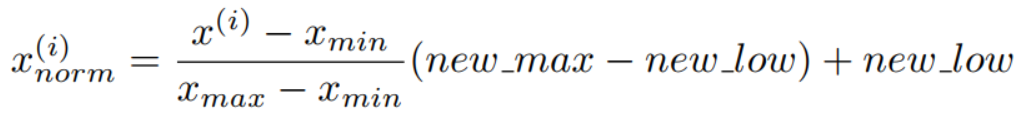
    
    
- (주로 사용★) Standardization(Z-score Normalization)
    - 기존 변수에 범위를 <b>정규분포로 변환</b>
    - <b>실제 Min-Max의 값을 모를 때 활용 가능</b>
    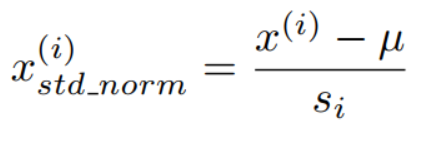
- 주의사항
    - 실제 사용할 때는 반드시 <b>정규화 Parameter(최대/최소, 평균/표준편차) 등을 기억하며 새로운 값에 적용</b>해야 함

In [1]:
# code from - https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn

import pandas as pd
import numpy as np

df = pd.DataFrame({'A':[14.00,90.20,90.95,96.27,91.21],'B':[103.02,107.26,110.35,114.23,114.68], 'C':['big','small','big','small','small']})
df

,A,B,C
0,14.00,103.02,big
1,90.20,107.26,small
2,90.95,110.35,big
3,96.27,114.23,small
4,91.21,114.68,small


### pandas로 하는 방법

##### Min-Max Normalization

In [3]:
(df['A'] - df['A'].min()) / (df['A'].max() - df['A'].min()) * (5 - 1) + 1

0    1.000000
1    4.704874
2    4.741339
3    5.000000
4    4.753981
Name: A, dtype: float64

##### Standardization(Z-score Normalization)

In [4]:
df['B'] = (df['B'] - df['B'].mean()) / (df['B'].std())
df

,A,B,C
0,14.00,-1.405250,big
1,90.20,-0.540230,small
2,90.95,0.090174,big
3,96.27,0.881749,small
4,91.21,0.973556,small


### Feature Scaling Function

In [5]:
def feature_scaling(df, scaling_strategy = 'min-max', column = None):   # 특정 column을 넣고 싶을 땐 리스트 형태로 넣고, 따로 지정하지 않는다면 전체 column이 적용됨
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == 'min-max':
            df[column_name] = (df[column_name] - df[column_name].min()) / (df[column_name].max() - df[column_name].min())
        elif scaling_strategy == 'z-score':
            df[column_name] = (df[column_name] - df[column_name].mean()) / (df[column_name].std())
    return df

In [6]:
feature_scaling(df, column = ["A", "B"])

,A,B,C
0,0.000000,0.000000,big
1,0.926219,0.363636,small
2,0.935335,0.628645,big
3,1.000000,0.961407,small
4,0.938495,1.000000,small


### Feature Scaling with sklearn

- Label encoder와 마찬가지로, sklearn도 feature scale 지원
- MinMaxScaler와 StandardScaler 사용

In [10]:
# code from - http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

df = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [9]:
df = feature_scaling(df, "min-max", column = ['Alcohol', 'Malic acid'])
df.head()

,Class label,Alcohol,Malic acid
0,1,0.842105,0.191700
1,1,0.571053,0.205534
2,1,0.560526,0.320158
3,1,0.878947,0.239130
4,1,0.581579,0.365613


##### Standardization(Z-score Normalization)

In [11]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
std_scaler.mean_

array([13.00061798,  2.33634831])

In [12]:
std_scaler.var_

array([0.65535973, 1.24100408])

In [13]:
df_std = std_scaler.transform(df[['Alcohol', 'Malic acid']])
df_std[:5]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

- Preprocessing은 모두 fit → transform의 과정을 거침
- 이유는 label encoder와 동일
- 단, scaler는 한번에 여러 column을 처리 가능

##### Min-Max Normalization

In [15]:
minmax_scaler = preprocessing.MinMaxScaler(feature_range = (0, 5)).fit(df[['Alcohol', 'Malic acid']])   # MinMaxScaler의 파라미터로 feature_range로 최소/최대 지정 가능
df_minmax = minmax_scaler.transform(df[['Alcohol', 'Malic acid']])
df_minmax[:3]

array([[4.21052632, 0.95849802],
       [2.85526316, 1.02766798],
       [2.80263158, 1.60079051]])